# Introduction

In this project, we will analyze a movies dataset to find interesting insights.
Some of the main questions we will try to answer:

- Is there a relationship between movie budget and revenue?
- What genres are most common in high-grossing movies?
- How has the average movie budget changed over time?



In [32]:
# import libaraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
# read the data
df=pd.read_csv('tmdb-movies.csv')

In [93]:
# explore the data
df.head(10)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   
5  281957  tt1663202    9.110700  135000000   532950503   
6   87101  tt1340138    8.654359  155000000   440603537   
7  286217  tt3659388    7.667400  108000000   595380321   
8  211672  tt2293640    7.404165   74000000  1156730962   
9  150540  tt2096673    6.326804  175000000   853708609   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5                  The Revenant   
6            Terminator Genisys   
7                   The Martian   
8                       Minions   
9                    Inside Out   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
5  Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...   
6  Arnold Schwarzenegger|Jason Clarke|Emilia Clar...   
7  Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...   
8  Sandra Bullock|Jon Hamm|Michael Keaton|Allison...   
9  Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...   

                         director  \
0                 Colin Trevorrow   
1                   George Miller   
2                Robert Schwentke   
3                     J.J. Abrams   
4                       James Wan   
5  Alejandro GonzÃ¡lez IÃ±Ã¡rritu   
6                     Alan Taylor   
7                    Ridley Scott   
8        Kyle Balda|Pierre Coffin   
9                     Pete Docter   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   
5  father-son relationship|rape|based on novel|mo...   
6  saving the world|artificial intelligence|cybor...   
7        based on novel|mars|nasa|isolation|botanist   
8  assistant|aftercreditsstinger|duringcreditssti...   
9       dream|cartoon|imaginary friend|animation|kid   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   
5  In the 1820s, a frontiersman, Hugh Glass, sets...      156   
6  The year is 2029. John Connor, leader of the r...      125   
7  During a manned mission to Mars, Astronaut Mar...      141   
8  Minions Stuart, Kevin and Bob are recruited by...       91   
9  Growing up can be a bumpy road, and it's no ex...       94   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   
5           Western|Drama|Adventure|Thriller   
6  Science Fiction|Action|Thriller|Adventure   
7            Drama|Adventure|Science Fiction   
8          Family|Animation|Adventure|Comedy   
9                    Comedy|Animation|Family   

                                production_companies release_date  vote_count  \
0  

In [35]:
# show the columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [36]:
# show the shape of our data
df.shape

(10866, 21)

In [37]:
# info of the data like number of nulls and the data typs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [38]:
# we need to show the mean ,std,count, and 5 numbers of our data
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

## Data Cleaning

We need to clean our data to make sure the analysis is correct.

In [39]:
#number of nulles in each coulmns
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [40]:
df['keywords'][0:10]

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
5    father-son relationship|rape|based on novel|mo...
6    saving the world|artificial intelligence|cybor...
7          based on novel|mars|nasa|isolation|botanist
8    assistant|aftercreditsstinger|duringcreditssti...
9         dream|cartoon|imaginary friend|animation|kid
Name: keywords, dtype: object

In [41]:
df.isna().mean()

id                      0.000000
imdb_id                 0.000920
popularity              0.000000
budget                  0.000000
revenue                 0.000000
original_title          0.000000
cast                    0.006994
homepage                0.729799
director                0.004049
tagline                 0.259893
keywords                0.137401
overview                0.000368
runtime                 0.000000
genres                  0.002117
production_companies    0.094791
release_date            0.000000
vote_count              0.000000
vote_average            0.000000
release_year            0.000000
budget_adj              0.000000
revenue_adj             0.000000
dtype: float64

In [42]:
# total number of nulls
df.isna().sum().sum()

13434

as we see we have a columns that have a lot of nulls we need to clean our data

we make a function that drop columns which have nulls greater than 30%

In [43]:
def drop_null_columns(df,threshold=0.25):
    null_per = df.isna().mean()
    columns_to_drop = null_per[null_per >= threshold].index
    return df.drop(columns=columns_to_drop)

In [44]:
df=drop_null_columns(df)

In [45]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [46]:
# drop the nulls from datasets
df.dropna(inplace=True)

In [47]:
df.isna().sum().sum()

0

In [48]:
df.shape

(8665, 19)

In [49]:
# number of duplicates
df.duplicated().sum()

1

In [50]:
#drop duplicates
df.drop_duplicates(inplace=True)

finallyyy , my data is now cleaned 👏

# Data visualization

In [82]:
# function to plot histogram for more than  coulmn

def Draw_histogram(df, column):

    plt.hist(df[column], edgecolor="black")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    plt.show()


let's see the popularity freqency

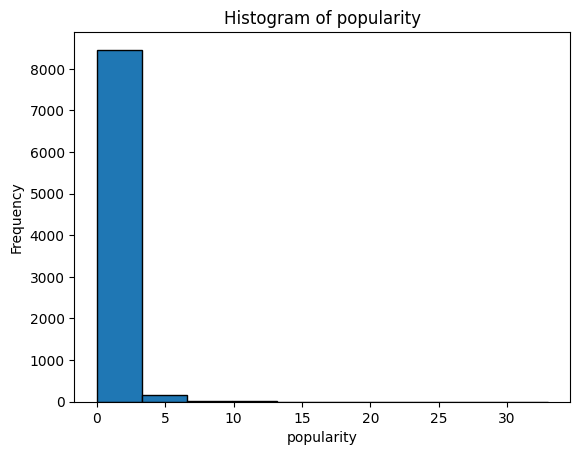

In [83]:
#plot the histogram for popularity
Draw_histogram(df,'popularity')

Most values of popularity are concentrated near zero,
meaning the majority of movies have very low popularity which lead to right skewed

  let's see the most vote freqency

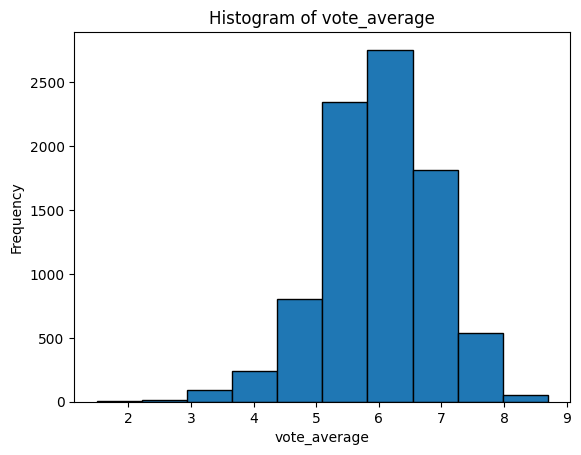

In [84]:
Draw_histogram(df,"vote_average")

the highst vote avarge is between 6 an 7

let's see the scatter btween bugdet and revenue

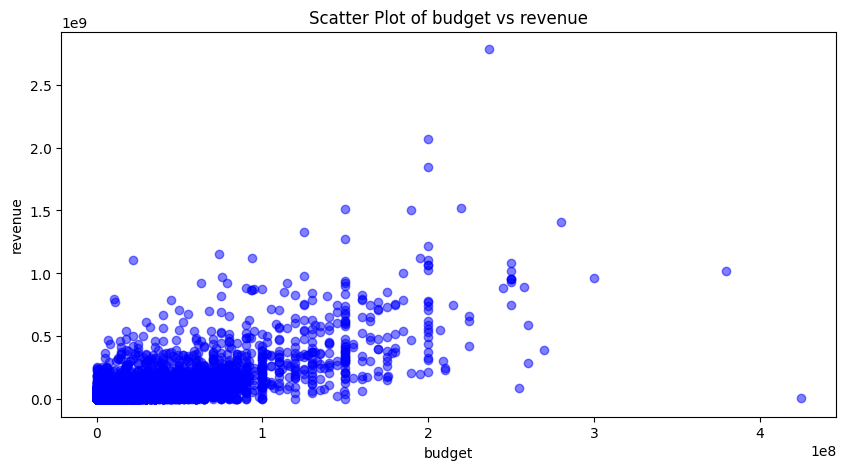

In [92]:
plt.figure(figsize=(10, 5))
plt.scatter(df['budget'], df['revenue'], color='blue', alpha=0.5)

plt.xlabel('budget')
plt.ylabel('revenue')
plt.title(f'Scatter Plot of budget vs revenue')

plt.show()



i axpect to see the high budget lead to high revenue but as we see there is high budget have almost lower revenue 🤔 🤔

**Which genres are most popular from year to year?**

In [51]:
# most popularity
most_popularity=df['popularity'].sort_values()[-1:-6:-1]

In [52]:
most_popularity

0      32.985763
1      28.419936
629    24.949134
630    14.311205
2      13.112507
Name: popularity, dtype: float64

In [53]:
# extract the top moives of most popularity
top_moives=df.loc[most_popularity.index]

In [54]:
# find the genres of most popularity
top_moives['genres']

0      Action|Adventure|Science Fiction|Thriller
1      Action|Adventure|Science Fiction|Thriller
629              Adventure|Drama|Science Fiction
630             Action|Science Fiction|Adventure
2             Adventure|Science Fiction|Thriller
Name: genres, dtype: object

but we need the most popular year by year

In [55]:
genre_popularity = df.groupby(['release_year', 'genres'])['popularity'].sum().reset_index()

# Get the most popular genre each year
most_popular_over_years = genre_popularity.loc[genre_popularity.groupby('release_year')['popularity'].idxmax()]

most_popular_over_years

release_year                                     genres  popularity
17            1960                      Drama|Horror|Thriller    2.610362
27            1961          Adventure|Animation|Comedy|Family    2.631987
51            1962                  Adventure|Action|Thriller    3.170651
73            1963                  Action|Thriller|Adventure    2.508235
102           1964                  Adventure|Action|Thriller    3.153791
144           1965                  Adventure|Action|Thriller    1.910465
181           1966                    Animation|Family|Comedy    1.227582
214           1967                       Comedy|Drama|Romance    2.958316
258           1968          Science Fiction|Mystery|Adventure    3.309196
270           1969                  Adventure|Action|Thriller    1.778746
295           1970          Animation|Comedy|Family|Adventure    1.936962
352           1971                      Science Fiction|Drama    3.072555
378           1972                                Drama|Crime    5.738034
402           1973                           Animation|Family    2.272486
456           1974                                Drama|Crime    3.264571
485           1975                                      Drama    4.373433
525           1976                                      Drama    2.866069
549           1977           Adventure|Action|Science Fiction   12.037933
628           1978                            Horror|Thriller    2.761549
670           1979     Horror|Action|Thriller|Science Fiction    4.935897
696           1980           Adventure|Action|Science Fiction    5.488441
743           1981                           Adventure|Action    4.578300
845           1982             Science Fiction|Drama|Thriller    4.215642
862           1983           Adventure|Action|Science Fiction    4.828854
923           1984            Action|Thriller|Science Fiction    4.831966
1010          1985    Adventure|Comedy|Science Fiction|Family    6.095293
1116          1986     Horror|Action|Thriller|Science Fiction    2.485419
1207          1987  Science Fiction|Action|Adventure|Thriller    3.474728
1275          1988                            Horror|Thriller    4.147804
1314          1989                           Animation|Family    4.143585
1384          1990                            Action|Thriller    3.998190
1533          1991     Romance|Family|Animation|Fantasy|Music    3.852269
1590          1992                             Crime|Thriller    4.954423
1670          1993                                     Comedy    5.242356
1782          1994                       Comedy|Drama|Romance   10.486868
1924          1995                              Drama|Romance    6.896980
1995          1996                                     Comedy    6.741320
2124          1997                                      Drama    5.991301
2218          1998                               Comedy|Drama    8.575315
2351          1999                                      Drama   21.139651
2450          2000                                     Comedy    8.411395
2581          2001                                     Comedy   10.205355
2698          2002                   Adventure|Fantasy|Action    8.095275
2838          2003                   Adventure|Fantasy|Action   13.986522
2991          2004                                     Comedy   16.021889
3148          2005                                     Comedy   11.255946
3313          2006                                     Comedy   16.588829
3504          2007                                     Comedy   11.330365
3720          2008                                      Drama   14.766948
3890          2009                                     Comedy   16.730858
4130          2010                                      Drama   15.637930
4278          2011                                     Comedy   23.175497
4510          2012                                      Drama   14.710036
4702      

as we see from 1960 to 1970 the most generate popularty are : Thriller Science Fiction and Adventur

from 1970 to 1980 the most generate popularty are : drama ,Science Fiction and Adventur

from 1980 to 1990 the most generate popularty are : Adventure ,Comedy and Science Fiction Family

from 1990 to 2000 the most generate popularty are :Comedy ,Drama and Romance

from 2000 to 2015 the most generate popularty are :
Comedy and Drama but in 2015  Action|Adventure has highest popularity

**Which movies has the highest budget?**

In [94]:
top_budget=df.sort_values('budget',ascending=False).head(10)
top_budget.head(2)

id    imdb_id  popularity     budget     revenue  \
2244  46528  tt1032751     0.25054  425000000    11087569   
3375   1865  tt1298650     4.95513  380000000  1021683000   

                                   original_title  \
2244                            The Warrior's Way   
3375  Pirates of the Caribbean: On Stranger Tides   

                                                   cast      director  \
2244  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...    Sngmoo Lee   
3375  Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...  Rob Marshall   

                                               keywords  \
2244  assassin|small town|revenge|deception|super speed   
3375            sea|captain|mutiny|sword|prime minister   

                                               overview  runtime  \
2244  An Asian assassin (Dong-gun Jang) is forced to...      100   
3375  Captain Jack Sparrow crosses paths with a woma...      136   

                                         genres  \
2244  Adventure|Fantasy|Action|Western|Thriller   
3375                   Adventure|Action|Fantasy   

                                   production_companies release_date  \
2244                           Boram Entertainment Inc.      12/2/10   
3375  Walt Disney Pictures|Jerry Bruckheimer Films|M...      5/11/11   

      vote_count  vote_average  release_year    budget_adj   revenue_adj  
2244          74           6.4          2010  4.250000e+08  1.108757e+07  
3375        3180           6.3          2011  3.683713e+08  9.904175e+08

In [57]:
# movies has the highest budget
top_budget[['original_title','budget_adj']]

original_title    budget_adj
2244                             The Warrior's Way  4.250000e+08
3375   Pirates of the Caribbean: On Stranger Tides  3.683713e+08
7387      Pirates of the Caribbean: At World's End  3.155006e+08
14                         Avengers: Age of Ultron  2.575999e+08
6570                              Superman Returns  2.920507e+08
4411                                   John Carter  2.469335e+08
1929                                       Tangled  2.600000e+08
7394                                  Spider-Man 3  2.713305e+08
5508                               The Lone Ranger  2.386885e+08
1923  Harry Potter and the Deathly Hallows: Part 1  2.500000e+08

as we see The Warrior's Way and Pirates of the Caribbean: On Stranger Tides  have the highest budget

**Which movies has the highest revenue?**

In [58]:
highest_revenue=df.sort_values('revenue',ascending=False).head()

In [95]:
highest_revenue[['revenue_adj','original_title','budget_adj']]

revenue_adj                original_title    budget_adj
1386  2.827124e+09                        Avatar  2.408869e+08
3     1.902723e+09  Star Wars: The Force Awakens  1.839999e+08
5231  2.506406e+09                       Titanic  2.716921e+08
4361  1.443191e+09                  The Avengers  2.089437e+08
0     1.392446e+09                Jurassic World  1.379999e+08

avater movie and star wars have the hightest revenue although they don't have the highest budget

**What kinds of properties are associated with movies that have high revenues?**

In [97]:
# geners of the movies which have hightest revenue
df.groupby('genres')['revenue_adj'].mean().sort_values(ascending=False).head(10)


genres
Horror|Thriller|Adventure                            1.907006e+09
Science Fiction|Adventure|Family|Fantasy             1.791694e+09
Crime|Drama|Mystery|Thriller|Action                  1.583050e+09
Family|Animation|Drama                               1.159592e+09
Family|Fantasy|Adventure                             1.025467e+09
Adventure|Fantasy|Family|Mystery                     9.866889e+08
Action|Adventure|Science Fiction|Fantasy             9.513616e+08
Action|Thriller|Science Fiction|Mystery|Adventure    8.255000e+08
Science Fiction|Thriller|Action|Adventure            7.932166e+08
Adventure|Action|Science Fiction                     7.882602e+08
Name: revenue_adj, dtype: float64

the geners which have the hightest revenue are Horror|Thriller|Adventure  and Science Fiction|Adventure|Family|Fantasy

In [61]:
# popularity of the movies which have hightest revenue
df.groupby(['popularity','original_title'])['revenue_adj'].mean().sort_values(ascending=False).head(10)

popularity  original_title                
9.432768    Avatar                            2.827124e+09
12.037933   Star Wars                         2.789712e+09
4.355219    Titanic                           2.506406e+09
2.010733    The Exorcist                      2.167325e+09
2.563191    Jaws                              1.907006e+09
11.173104   Star Wars: The Force Awakens      1.902723e+09
2.900556    E.T. the Extra-Terrestrial        1.791694e+09
1.136610    The Net                           1.583050e+09
2.631987    One Hundred and One Dalmatians    1.574815e+09
7.637767    The Avengers                      1.443191e+09
Name: revenue_adj, dtype: float64

the movies which have the highest popularity have also high revenue

**Which director has the highest total revenue?**

In [62]:
top_director = df.groupby('director')['revenue'].sum()  #total revenue
top_director = top_director.sort_values(ascending=False)  #Sort directors

print(top_director.head(5))

director
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
Name: revenue, dtype: int64


Steven Spielberg and Peter Jackson  have the highest revenue till 2015

# Conclusion:
* Popular movies as usual have a big budget, but as we see this movies not popular

* Some low-budget movies become famous because people love them

* Movies with high budgets often make a lot of money, but some still fail even if they spend a lot

* Different genres are popular each year, like action and adventure, because people enjoy exciting movies.

* There are some strange numbers, like movies with extremely high budgets or unusually high popularity.

# Limitations:

* The numbers are not balanced, a few movies get most of the money and popularity, while many movies are ignored.

* Some data is missing, like full cast details and official movie websites, which makes the analysis incomplete.

* Popularity doesn’t mean the movie is good, some famous movies are not liked by the watchers.

* Revenue data is unclear, we don’t know if a movie made money in one country but failed in another.




